<a href="https://colab.research.google.com/github/20BaNi00/Amigo-Secreto/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [5]:
pip install pandas pyarrow

In [6]:
pip install plotly

In [7]:
pip install nbformat

In [8]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Función para dar formato estilo moneda al resultado
def format_currency(amount):
    return '${:,.2f}'.format(amount)

# Calcular el total de ventas (Precio) para cada tienda
total_tienda1 = tienda['Precio'].sum()
total_tienda2 = tienda2['Precio'].sum()
total_tienda3 = tienda3['Precio'].sum()
total_tienda4 = tienda4['Precio'].sum()

# Imprimir los resultados
print(f"Total de ventas Tienda 1: {format_currency(total_tienda1)}")
print(f"Total de ventas Tienda 2: {format_currency(total_tienda2)}")
print(f"Total de ventas Tienda 3: {format_currency(total_tienda3)}")
print(f"Total de ventas Tienda 4: {format_currency(total_tienda4)}")

# Preparar datos para el gráfico de pastel
totales = [total_tienda1, total_tienda2, total_tienda3, total_tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, naranja, verde, rojo

# Verificar que haya datos válidos
if sum(totales) <= 0:
    print("Error: No hay datos válidos para generar el gráfico de pastel.")
else:
    # Crear el gráfico de pastel
    plt.figure(figsize=(8, 8))
    # Generar el gráfico con etiquetas que incluyan el nombre, porcentaje y valor en moneda
    labels = [f"{nombre}\n{format_currency(total)}" for nombre, total in zip(nombres_tiendas, totales)]
    plt.pie(totales, labels=labels, colors=colores, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
    plt.title('Distribución de Ingresos Totales por Tienda', fontsize=14)
    # Hacer que el gráfico sea circular
    plt.axis('equal')
    # Ajustar el diseño
    plt.savefig(f'distribucion_ingresos_por_tienda.png')
    plt.tight_layout()

Total de ventas Tienda 1: $1,150,880,400.00
Total de ventas Tienda 2: $1,116,343,500.00
Total de ventas Tienda 3: $1,098,019,600.00
Total de ventas Tienda 4: $1,038,375,700.00


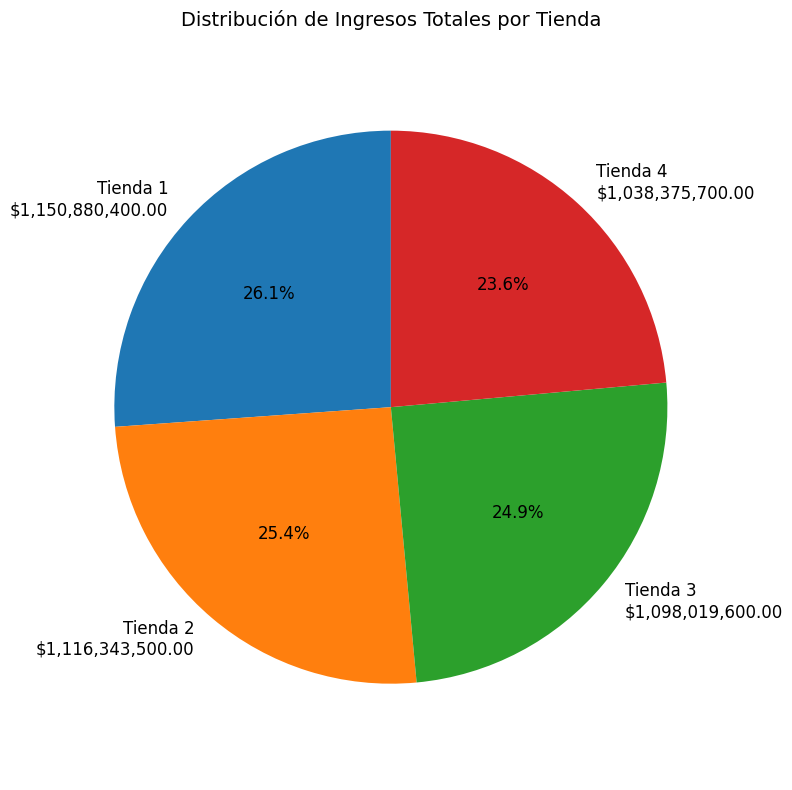

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# ### Importación de datos
!pip install pandas pyarrow
!pip install plotly
!pip install nbformat

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

# #1. Análisis de facturación
#
#
# Función para dar formato estilo moneda al resultado
def format_currency(amount):
  return '${:,.2f}'.format(amount)

# List of dataframes and their names
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Calculate total sales for each store using a loop
totales = []
nombres_tiendas = []

for nombre, df in tiendas.items():
  total = df['Precio'].sum()
  totales.append(total)
  nombres_tiendas.append(nombre)
  print(f"Total de ventas {nombre}: {format_currency(total)}")

colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, naranja, verde, rojo

# Verificar que haya datos válidos
if sum(totales) <= 0:
  print("Error: No hay datos válidos para generar el gráfico de pastel.")
else:
  # Crear el gráfico de pastel
  plt.figure(figsize=(8, 8))
  # Generar el gráfico con etiquetas que incluyan el nombre, porcentaje y valor en moneda
  labels = [f"{nombre}\n{format_currency(total)}" for nombre, total in zip(nombres_tiendas, totales)]
  plt.pie(totales, labels=labels, colors=colores, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
  plt.title('Distribución de Ingresos Totales por Tienda', fontsize=14)
  # Hacer que el gráfico sea circular
  plt.axis('equal')
  # Ajustar el diseño
  plt.savefig('distribucion_ingresos_por_tienda.png')
  plt.tight_layout()


# 2. Ventas por categoría

Análisis de Ventas por Categoría:
---------------------------------

--- Tienda 1 - Ventas por Categoría ---
 Categoría del Producto  Cantidad Vendida
                Muebles               465
           Electrónicos               448
               Juguetes               324
      Electrodomésticos               312
   Deportes y diversión               284
 Instrumentos musicales               182
                 Libros               173
Artículos para el hogar               171
Categoría con más ventas: Muebles (465 ventas)

--- Tienda 2 - Ventas por Categoría ---
 Categoría del Producto  Cantidad Vendida
                Muebles               442
           Electrónicos               422
               Juguetes               313
      Electrodomésticos               305
   Deportes y diversión               275
 Instrumentos musicales               224
                 Libros               197
Artículos para el hogar               181
Categoría con más ventas: Muebles (442 ventas)


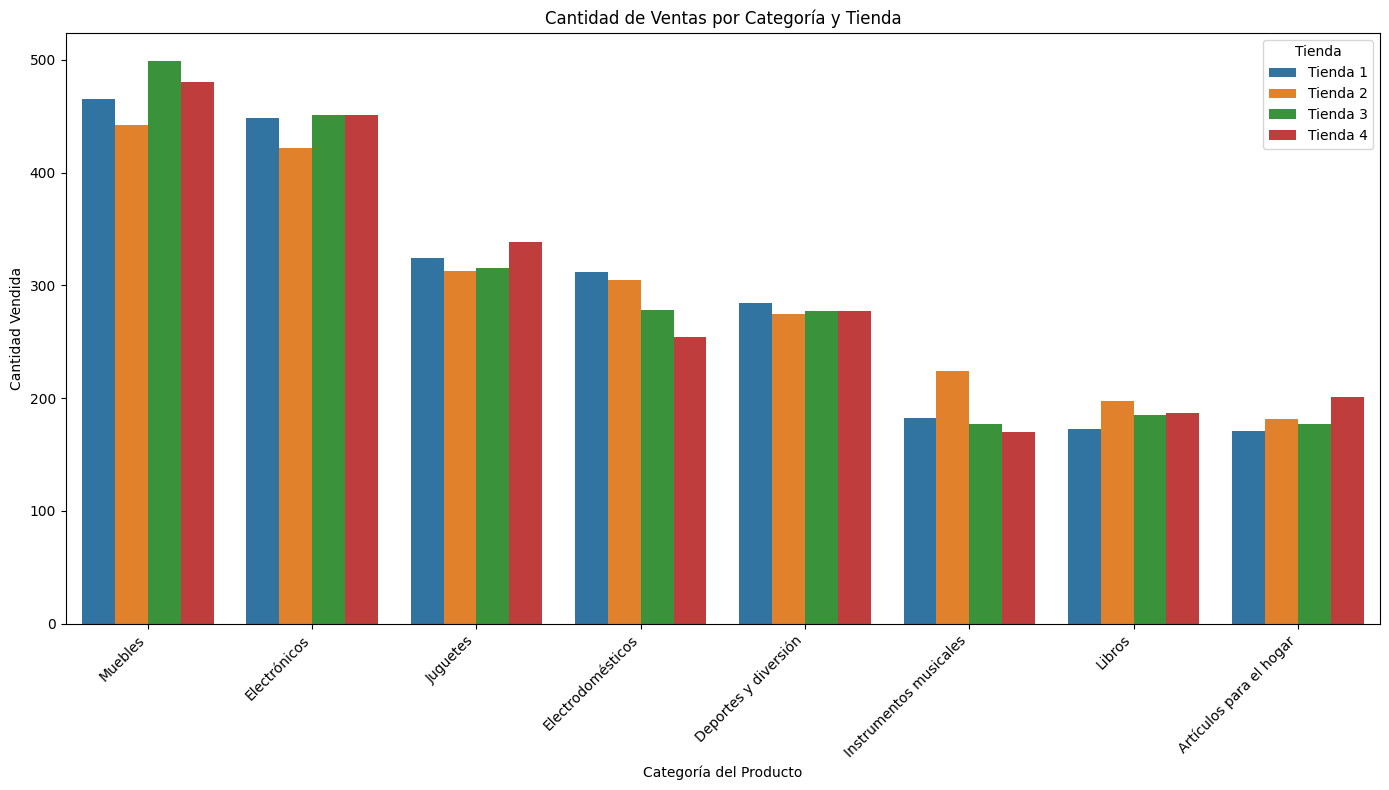


--- Ventas Totales por Categoría (Todas las Tiendas) ---
 Categoría del Producto  Cantidad Vendida
                Muebles              1886
           Electrónicos              1772
               Juguetes              1290
      Electrodomésticos              1149
   Deportes y diversión              1113
 Instrumentos musicales               753
                 Libros               742
Artículos para el hogar               730

Categoría con más ventas a nivel global: Muebles (1886 ventas)


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Instalar bibliotecas si no están presentes (asegurarse de que estas líneas no se repitan si ya las tienes en la celda anterior)
!pip install pandas pyarrow
!pip install plotly
!pip install nbformat
!pip install matplotlib seaborn

# Carga de datos (asegurarse de que estas líneas no se repitan si ya las tienes en la celda anterior)
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


# Lista de tiendas con sus datos y nombres
tiendas = [
    (tienda, "Tienda 1"),
    (tienda2, "Tienda 2"),
    (tienda3, "Tienda 3"),
    (tienda4, "Tienda 4")
]

# Lista para almacenar los datos de ventas por categoría de todas las tiendas para el gráfico
ventas_para_grafico = []

# Procesar cada tienda
print("Análisis de Ventas por Categoría:")
print("---------------------------------")
for df, nombre_tienda in tiendas:
    # Agrupar por Categoría del Producto y contar las ventas
    ventas_por_categoria = df.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')

    # Ordenar por cantidad vendida de mayor a menor
    ventas_por_categoria = ventas_por_categoria.sort_values(by='Cantidad Vendida', ascending=False)

    # Mostrar resultados
    print(f"\n--- {nombre_tienda} - Ventas por Categoría ---")
    print(ventas_por_categoria.to_string(index=False)) # Usar to_string para mostrar todo el DataFrame

    # Imprimir la categoría con más ventas
    if not ventas_por_categoria.empty:
        categoria_mas_vendida = ventas_por_categoria.iloc[0]['Categoría del Producto']
        cantidad_mas_vendida = ventas_por_categoria.iloc[0]['Cantidad Vendida']
        print(f"Categoría con más ventas: {categoria_mas_vendida} ({cantidad_mas_vendida} ventas)")
    else:
        print(f"No hay datos de ventas para {nombre_tienda}")

    # Agregar datos a la lista para el gráfico, añadiendo la columna de tienda
    ventas_por_categoria['Tienda'] = nombre_tienda
    ventas_para_grafico.append(ventas_por_categoria)

# Concatenar los DataFrames de todas las tiendas para el gráfico
df_ventas_consolidado = pd.concat(ventas_para_grafico, ignore_index=True)

# Crear el gráfico usando Seaborn (más flexible y estético)
plt.figure(figsize=(14, 8))
sns.barplot(data=df_ventas_consolidado, x='Categoría del Producto', y='Cantidad Vendida', hue='Tienda')
plt.title('Cantidad de Ventas por Categoría y Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x para mayor legibilidad
plt.legend(title='Tienda')
plt.tight_layout() # Ajustar el layout para evitar que las etiquetas se corten
plt.show()

# --- Análisis Adicional (Opcional) ---
# Encontrar las categorías más vendidas en general (sumando todas las tiendas)
ventas_totales_por_categoria = df_ventas_consolidado.groupby('Categoría del Producto')['Cantidad Vendida'].sum().reset_index()
ventas_totales_por_categoria = ventas_totales_por_categoria.sort_values(by='Cantidad Vendida', ascending=False)

print("\n--- Ventas Totales por Categoría (Todas las Tiendas) ---")
print(ventas_totales_por_categoria.to_string(index=False))

if not ventas_totales_por_categoria.empty:
    categoria_global_mas_vendida = ventas_totales_por_categoria.iloc[0]['Categoría del Producto']
    cantidad_global_mas_vendida = ventas_totales_por_categoria.iloc[0]['Cantidad Vendida']
    print(f"\nCategoría con más ventas a nivel global: {categoria_global_mas_vendida} ({cantidad_global_mas_vendida} ventas)")
else:
    print("\nNo hay datos de ventas consolidados por categoría.")



# 3. Calificación promedio de la tienda


In [31]:
print("\nAnálisis de Calificación Promedio:")
print("------------------------------------")
for df, nombre_tienda in tiendas:
    # Calcular la calificación promedio, manejando casos sin calificaciones
    if 'Calificación' in df.columns and not df['Calificación'].isnull().all():
        calificacion_promedio = df['Calificación'].mean()
        # Mostrar la calificación promedio formateada
        print(f"Calificación promedio en {nombre_tienda}: {calificacion_promedio:.2f}")
    else:
        print(f"No hay datos de calificación disponibles para {nombre_tienda}")


Análisis de Calificación Promedio:
------------------------------------
Calificación promedio en Tienda 1: 3.98
Calificación promedio en Tienda 2: 4.04
Calificación promedio en Tienda 3: 4.05
Calificación promedio en Tienda 4: 4.00


# 4. Productos más y menos vendidos


Tienda 1 - Ventas por Producto:
                       Producto  Cantidad Vendida
0                       Armario                60
1                 TV LED UHD 4K                60
2                    Microondas                60
3              Secadora de ropa                58
4                 Mesa de noche                56
5       Bloques de construcción                56
6           Balón de baloncesto                55
7                     Bicicleta                54
8                     Impresora                54
9                  Vaso térmico                54
10                 Refrigerador                54
11                      Batería                53
12                   Cubertería                52
13    Carrito de control remoto                52
14          Modelado predictivo                51
15                  Auriculares                50
16            Ajedrez de madera                49
17                    Iphone 15                49
18               

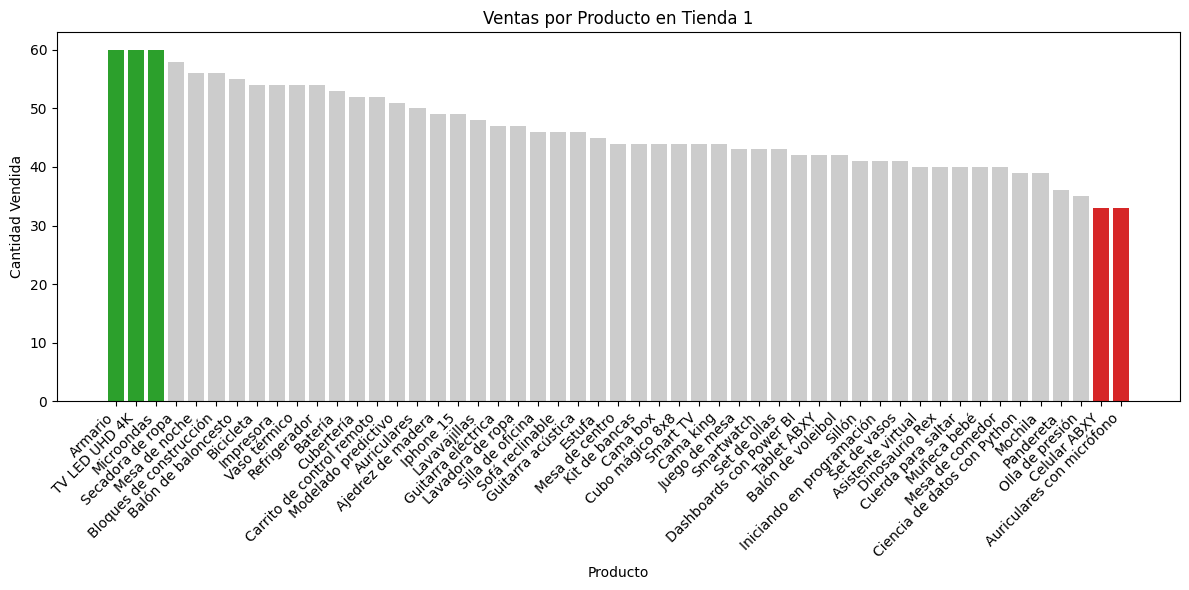

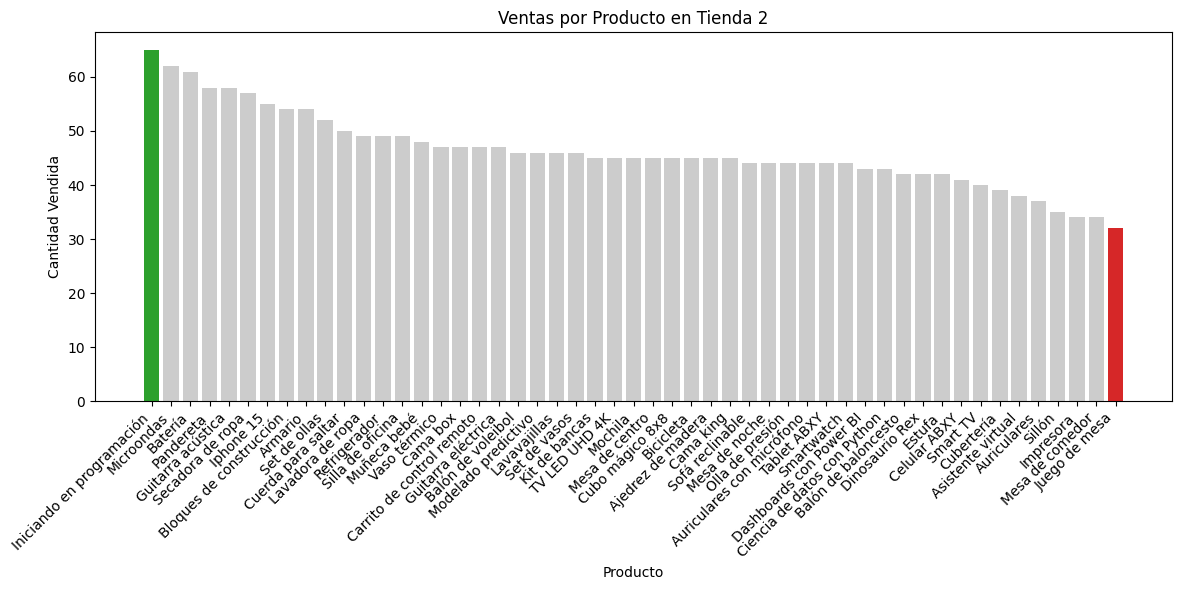

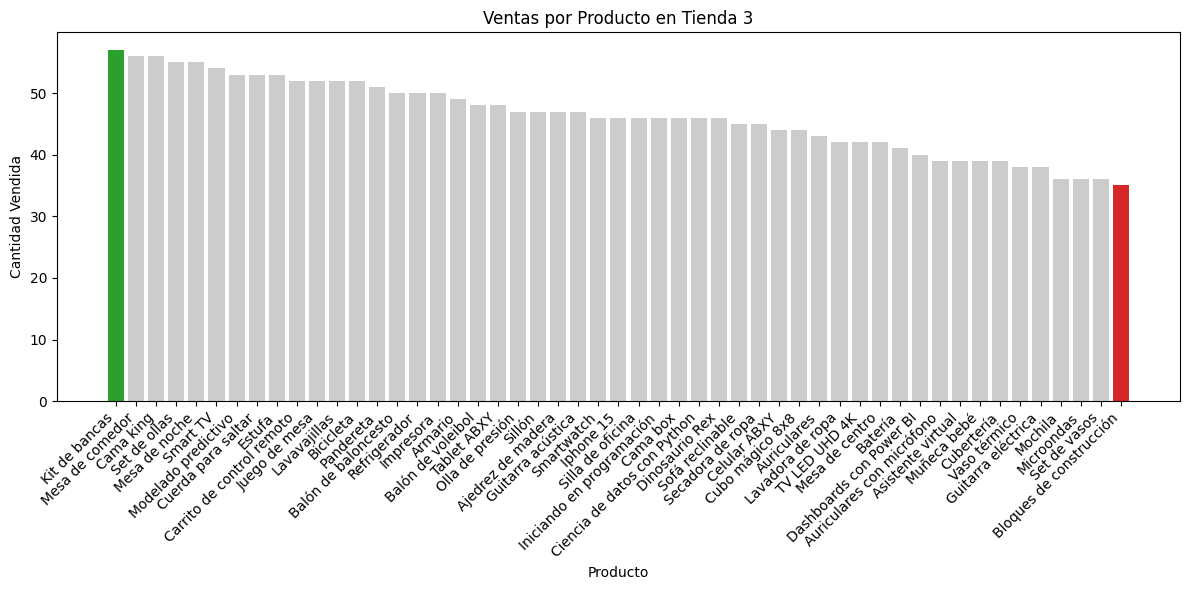

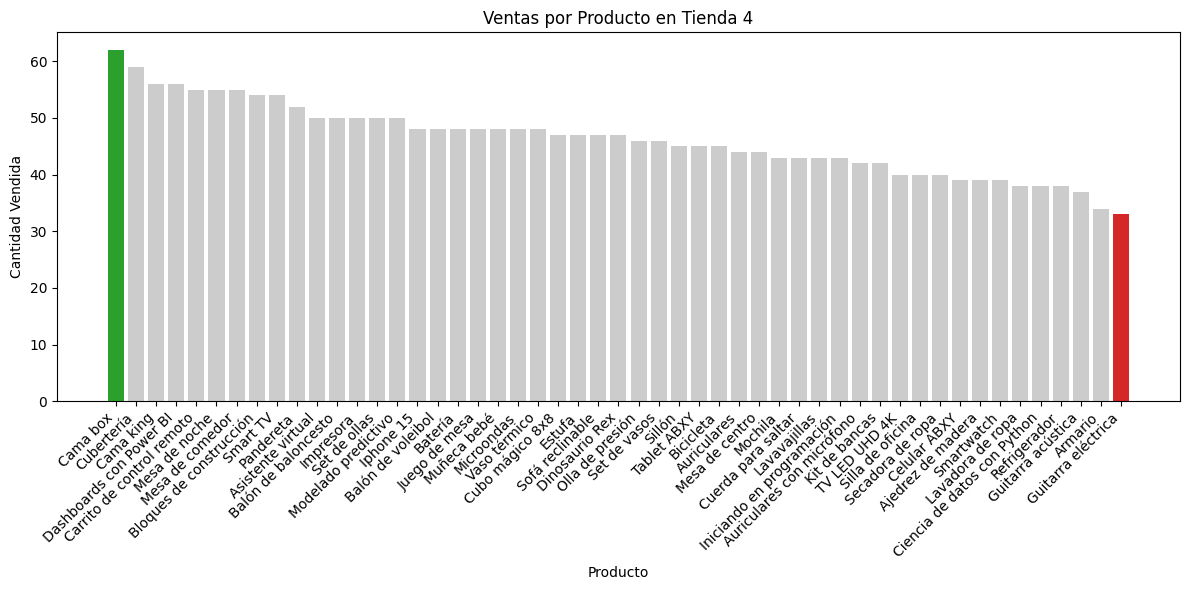

In [34]:
# Procesar cada tienda
for df, nombre_tienda in tiendas:
    # Agrupar por Producto y contar las ventas
    ventas_por_producto = df.groupby('Producto').size().reset_index(name='Cantidad Vendida')

    # Ordenar por cantidad vendida de mayor a menor
    ventas_por_producto = ventas_por_producto.sort_values(by='Cantidad Vendida', ascending=False)

    # Restablecer el índice para que sea consecutivo
    ventas_por_producto = ventas_por_producto.reset_index(drop=True)

    # Verificar si hay datos
    if ventas_por_producto.empty:
        print(f"\n{nombre_tienda} - No hay datos de ventas disponibles.")
        continue

    # Identificar el producto más vendido
    max_ventas = ventas_por_producto['Cantidad Vendida'].max()
    productos_mas_vendidos = ventas_por_producto[ventas_por_producto['Cantidad Vendida'] == max_ventas]['Producto'].tolist()

    # Identificar el producto menos vendido
    min_ventas = ventas_por_producto['Cantidad Vendida'].min()
    productos_menos_vendidos = ventas_por_producto[ventas_por_producto['Cantidad Vendida'] == min_ventas]['Producto'].tolist()

    # Mostrar resultados
    print(f"\n{nombre_tienda} - Ventas por Producto:")
    print(ventas_por_producto)
    print(f"Producto(s) más vendido(s): {', '.join(productos_mas_vendidos)} ({max_ventas} ventas)")
    print(f"Producto(s) menos vendido(s): {', '.join(productos_menos_vendidos)} ({min_ventas} ventas)")

    # Visualización
    plt.figure(figsize=(12, 6))
    # Crear lista de colores: verde para más vendido, rojo para menos vendido, gris para otros
    colores = []
    for _, row in ventas_por_producto.iterrows():
        if row['Producto'] in productos_mas_vendidos:
            colores.append('#2ca02c')  # Verde para más vendido
        elif row['Producto'] in productos_menos_vendidos:
            colores.append('#d62728')  # Rojo para menos vendido
        else:
            colores.append('#cccccc')  # Gris para otros

    plt.bar(ventas_por_producto['Producto'], ventas_por_producto['Cantidad Vendida'], color=colores)
    plt.title(f'Ventas por Producto en {nombre_tienda}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45, ha='right')
    plt.savefig(f'ventas_{nombre_tienda.replace(" ", "_").lower()}.png')
    plt.tight_layout()

# 5. Envío promedio por tienda


Análisis de Costo de Envío Promedio:
--------------------------------------
Costo de envío promedio en Tienda 1: $26,018.61
Costo de envío promedio en Tienda 2: $25,216.24
Costo de envío promedio en Tienda 3: $24,805.68
Costo de envío promedio en Tienda 4: $23,459.46


/tmp/ipython-input-36-1717440982.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nombres_tiendas_envio, y=costos_envio_promedio, palette='viridis')


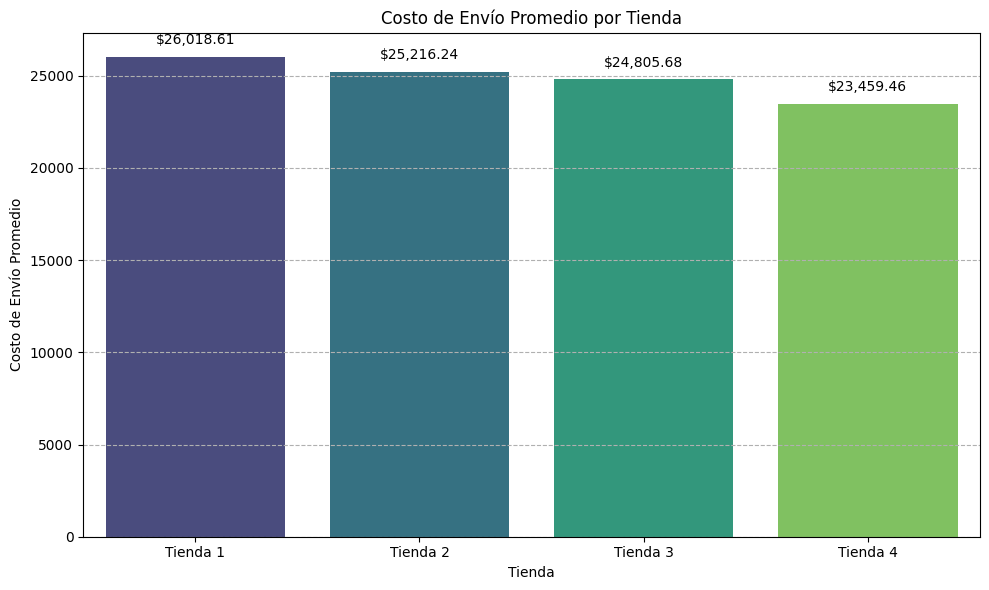

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
# 5. Envío promedio por tienda

# Lista para almacenar los costos de envío promedio por tienda (para el gráfico)
costos_envio_promedio = []
nombres_tiendas_envio = [] # Usar un nombre diferente para no sobrescribir la lista anterior si se usa después

# Procesar cada tienda
print("\nAnálisis de Costo de Envío Promedio:")
print("--------------------------------------")
for df, nombre_tienda in tiendas:
  try:
    # Verificar que la columna 'Costo de envío' existe
    if 'Costo de envío' not in df.columns:
      print(f"Error: La columna 'Costo de envío' no existe en {nombre_tienda}")
      # Añadir un valor por defecto (ej. 0) y el nombre para mantener la estructura del gráfico
      costos_envio_promedio.append(0)
      nombres_tiendas_envio.append(nombre_tienda)
      continue

    # Convertir la columna 'Costo de envío' a numérico, forzando errores a NaN
    # Esto maneja casos donde la columna puede tener valores no numéricos
    df['Costo de envío'] = pd.to_numeric(df['Costo de envío'], errors='coerce')

    # Calcular el costo de envío promedio, ignorando los valores NaN
    # .mean() ignora NaN por defecto
    costo_envio_promedio_tienda = df['Costo de envío'].mean()

    # Manejar caso de datos vacíos o todos NaN
    if pd.isna(costo_envio_promedio_tienda):
      print(f"Advertencia: No hay costos de envío válidos en {nombre_tienda}")
      costo_envio_promedio_tienda = 0 # O podrías usar NaN si prefieres que no aparezca en el gráfico

    # Almacenar para el gráfico
    costos_envio_promedio.append(costo_envio_promedio_tienda)
    nombres_tiendas_envio.append(nombre_tienda)

    # Mostrar el costo de envío promedio formateado
    print(f"Costo de envío promedio en {nombre_tienda}: {format_currency(costo_envio_promedio_tienda)}")

  except Exception as e:
    # Capturar cualquier otro error que pueda ocurrir durante el procesamiento de una tienda específica
    print(f"Error inesperado al procesar {nombre_tienda}: {e}")
    # Añadir un valor por defecto (ej. 0) y el nombre para mantener la estructura del gráfico
    costos_envio_promedio.append(0)
    nombres_tiendas_envio.append(nombre_tienda)

# --- Visualización del Costo de Envío Promedio ---
if nombres_tiendas_envio and sum(costos_envio_promedio) >= 0: # Asegurarse de que hay datos para graficar
    plt.figure(figsize=(10, 6))
    # Usar sns.barplot para un gráfico de barras más estético
    sns.barplot(x=nombres_tiendas_envio, y=costos_envio_promedio, palette='viridis')
    plt.title('Costo de Envío Promedio por Tienda')
    plt.xlabel('Tienda')
    plt.ylabel('Costo de Envío Promedio')
    plt.xticks(rotation=0) # No es necesario rotar si los nombres son cortos
    plt.grid(axis='y', linestyle='--') # Añadir una cuadrícula suave en el eje Y

    # Añadir los valores de los costos de envío promedio sobre las barras
    for i, costo in enumerate(costos_envio_promedio):
        # Usar format_currency para mostrar los valores en formato moneda
        plt.text(i, costo + (max(costos_envio_promedio)*0.02), format_currency(costo), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.savefig('costo_envio_promedio_por_tienda.png')
    plt.show()
else:
    print("\nNo hay datos válidos de costos de envío promedio para graficar.")